In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


Bad key "text.kerning_factor" on line 4 in
/Users/sdebuyl/.conda/envs/vub_37/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


We will analyze a dataset containing bacterial relative abundance from the gut of 33 individus. 

We first import the dataset (it is usually a time consumming step, it depends on the type of file the experimental data has been saved in and you should know how the information is organized): 

In [2]:
matrixX = np.genfromtxt('./data/MetaHIT_SangerSamplesgenus.txt')[:,1:].T
bacteria_names = np.genfromtxt('./data/MetaHIT_SangerSamplesgenus.txt',dtype=str)[:,0]
samples_names=['AM-F10-T1','AM-F10-T2','DA-AD-1','DA-AD-2','DA-AD-3','DA-AD-4','ES-AD-1','ES-AD-2','ES-AD-3','ES-AD-4','FR-AD-1','FR-AD-2','FR-AD-3','FR-AD-4','FR-AD-5','FR-AD-6','FR-AD-7','FR-AD-8','IT-AD-1','IT-AD-2','IT-AD-3','IT-AD-4','IT-AD-5','IT-AD-6','JP-AD-1','JP-AD-2','JP-AD-3','JP-AD-4','JP-AD-5','JP-AD-6','JP-AD-7','JP-AD-8','JP-AD-9']
print('dataset shape ',matrixX.shape)

dataset shape  (33, 248)


In [3]:
# pd.read_csv('./data/MetaHIT_SangerSamplesgenus.txt',delimiter="\t").iloc[1:,1:].to_numpy()

To do plots very easily, we will use the popular "panda" package. We need to put our dataset into a panda dataframe to be able to use the plotting functions of panda. 

In [6]:
# build a pandas dataframe - it will then be very easy to plot the data, we need to give the actual data matrix,
# the names of the lines (called 'index') and the names of the columns
df = pd.DataFrame(data=matrixX,index=samples_names,columns=bacteria_names)

dfmin = df.iloc[0:10,0:10]

# 0. Playing with arrays

In [7]:
my_ones = np.ones(5)
my_zeros = np.zeros(6)
an_array = np.array([2,3.3,-2.4])
my_start = 1.0
my_stop = 5.0
number_of_steps = 10
linearly_spaced_array = np.linspace(my_start,my_stop,number_of_steps)
print('my linearly spaced array is ',linearly_spaced_array)
a_random_array = np.random.rand(10)
print('my random array is ',a_random_array)
myorder = np.argsort(a_random_array)[::-1] #argsort gives the indices to sort from small to big, [::-1] is used to reverse the array
a_random_array_sorted = a_random_array[myorder]

print('my ordered random array is ',a_random_array_sorted)


my linearly spaced array is  [1.         1.44444444 1.88888889 2.33333333 2.77777778 3.22222222
 3.66666667 4.11111111 4.55555556 5.        ]
my random array is  [0.16600398 0.66338821 0.58377589 0.93045012 0.90684114 0.02213249
 0.01344353 0.71396154 0.61973693 0.02078794]
my ordered random array is  [0.93045012 0.90684114 0.71396154 0.66338821 0.61973693 0.58377589
 0.16600398 0.02213249 0.02078794 0.01344353]


(a) print the 2nd element of the array "a_random_array_sorted"

(b) define a new array which is composed of the 3 first entries of "a_random_array_sorted"

(c) print the lenght of "a_random_array_sorted"

In [8]:
means = np.mean(matrixX,axis=0)
means.shape

(248,)

# 1. Mean, variances & bar plot

1. compute the mean values and variances of each bacterial species -- use np.mean( ..., axis= ) and np.std(..., axis = ) then use "argsort" to sort bacteria per mean abundance (from most abundant to least abundant). 

2. do a bar plot (use sns.barplot(data = your_dataframe)) + add at title  + rem: if ticks are on top of each other, you can use plt.figure(figsize=(10,4)) and play around with the size of figure to make it big enough. 

In [16]:
myorder = np.argsort(means)[::-1] #argsort gives the indices to sort from small to big, [::-1] is used to reverse the array
df_sort= df.iloc[:,myorder[0:4]]

# 2. Median, quartiles, box and violin plots

do a box plot (use sns.boxplot(data=your_dataframe))

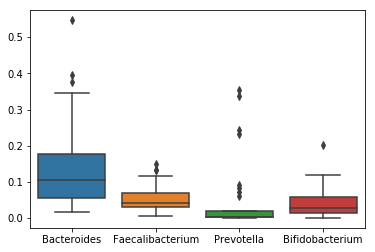

In [17]:
sns.boxplot(data=df_sort)

do a violin plot (use... sns.violin(data=my_dataframe))

# 3. Heatmaps

do a heatmap of the dataset (use sns.heatmap(data=my_dataframe) 

rem: 

(a) you can change color scheme by adding an option, ie cmap='Blues') 

(b) try to represent a subset of the full dataset. 



# 4. Manipulate matrices

We define here under a matrix containing a "fake" dataset. It consists of 140 samples for which we have "measured" two features x and y. It is generated from a random bivariate normal distribution with a chosen covariance matrix and mean values. 

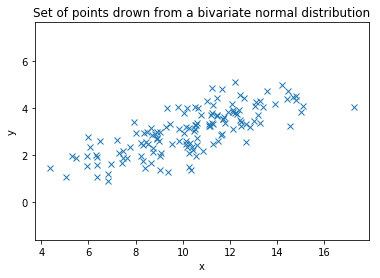

In [18]:
#https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.multivariate_normal.html

#we choose a covariance matrix, it must be symmetric and positive semi-definite
cov = np.array([[6, 2],[2,1]])
#we choose mean values for x and y
mean = [10,3]
#we choose the number of samples 
numb_points = 140
#we generate our data points 
matrixX  = np.random.multivariate_normal(mean, cov, numb_points)
#let's plot those points:
plt.plot(matrixX[:,0],matrixX[:,1],'x')
plt.title('Set of points drown from a bivariate normal distribution')
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('bivariate_dataset.pdf')
plt.show()

You can think of each cross representing one cell, and x and y has being the expression levels of two genes. 

The matrix containing this dataset, "matrixX", has the following shape:

In [20]:
1/3

0.3333333333333333

## Coordinate change 

If we have a vector $v = (1,2)$, implicitely it means we have chosen a basis $(e_1, e_2)$ and in this basis the components of the vector are (1,2): $v = e_1 + 2 e_2$. 

<img src="change_basis1.jpg" width="800" height="400">


We could have used another basis. How to express the vector $v$ in this other basis? 

<img src="change_basis2.jpg" width="800" height="400">

We will need to use the very useful fact that real symmetric matrices can be diagnonalized by orthogonal matrices: 


<img src="diag.jpg" width="800" height="400">


1. Our dataset can be viewed as an ensemble of 140 vectors given by couples (x,y). Define the coordinate change matrix to use (y,x) instead of (x,y). To encode a matrix, use np.array([[a11,a12],[a21,a22]]). The inverse of a matrix can be computed by using np.linalg.inv(). 

2. Apply the coordinate change to first sample. 

3. Apply the coordinate change to the full dataset matrixX at once. 

4. Come back to the original dataset and compute its covariance matrix. You can use the function np.cov. 

5. Compute its eigenvalues and eigenvectors (use np.linalg.eig) - do check your result
3. Diagonalise this matrix (check that the elements on the diagonal are the eigenvalues)

The function 'eigvals, eigvects = np.linalg.eig(mymatrix)' returns the eigenvalues "eigvals" and a matrix  "eigvects" containing the eigenvectors in columns, which corresponds to the coordinate change matrix directly. 